In [1]:
from sklearn import datasets
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

import statsmodels.api as sm
from statsmodels.formula.api import ols
from sklearn.model_selection import train_test_split


Let's load diabetes dataset from sklearn:


https://scikit-learn.org/stable/datasets/toy_dataset.html#diabetes-dataset


https://web.stanford.edu/~hastie/Papers/LARS/LeastAngle_2002.pdf

In [2]:
X,y = datasets.load_diabetes(return_X_y=True, as_frame=True)
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


- age age in years
- sex
- bmi body mass index
- bp average blood pressure
- s1 tc, total serum cholesterol
- s2 ldl, low-density lipoproteins
- s3 hdl, high-density lipoproteins
- s4 tch, total cholesterol / HDL
- s5 ltg, possibly log of serum triglycerides level
- s6 glu, blood sugar level

In [3]:
X.shape

(442, 10)

In [4]:
y.head()

0    151.0
1     75.0
2    141.0
3    206.0
4    135.0
Name: target, dtype: float64

In [5]:
diabetes_df = pd.concat([X,y], axis=1)
diabetes_df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [6]:
diabetes_df.isnull().sum()

age       0
sex       0
bmi       0
bp        0
s1        0
s2        0
s3        0
s4        0
s5        0
s6        0
target    0
dtype: int64

<AxesSubplot: >

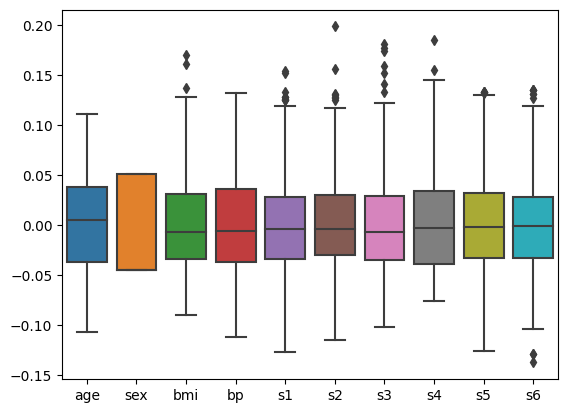

In [7]:
sns.boxplot(data=X)

Some outliers in bmi, cholesterol, lipoproteins, cholesterol and blood sugar level... not too many and need more expert info to know if they are important. 

What do you notice in the distributions of each column ?
- ..


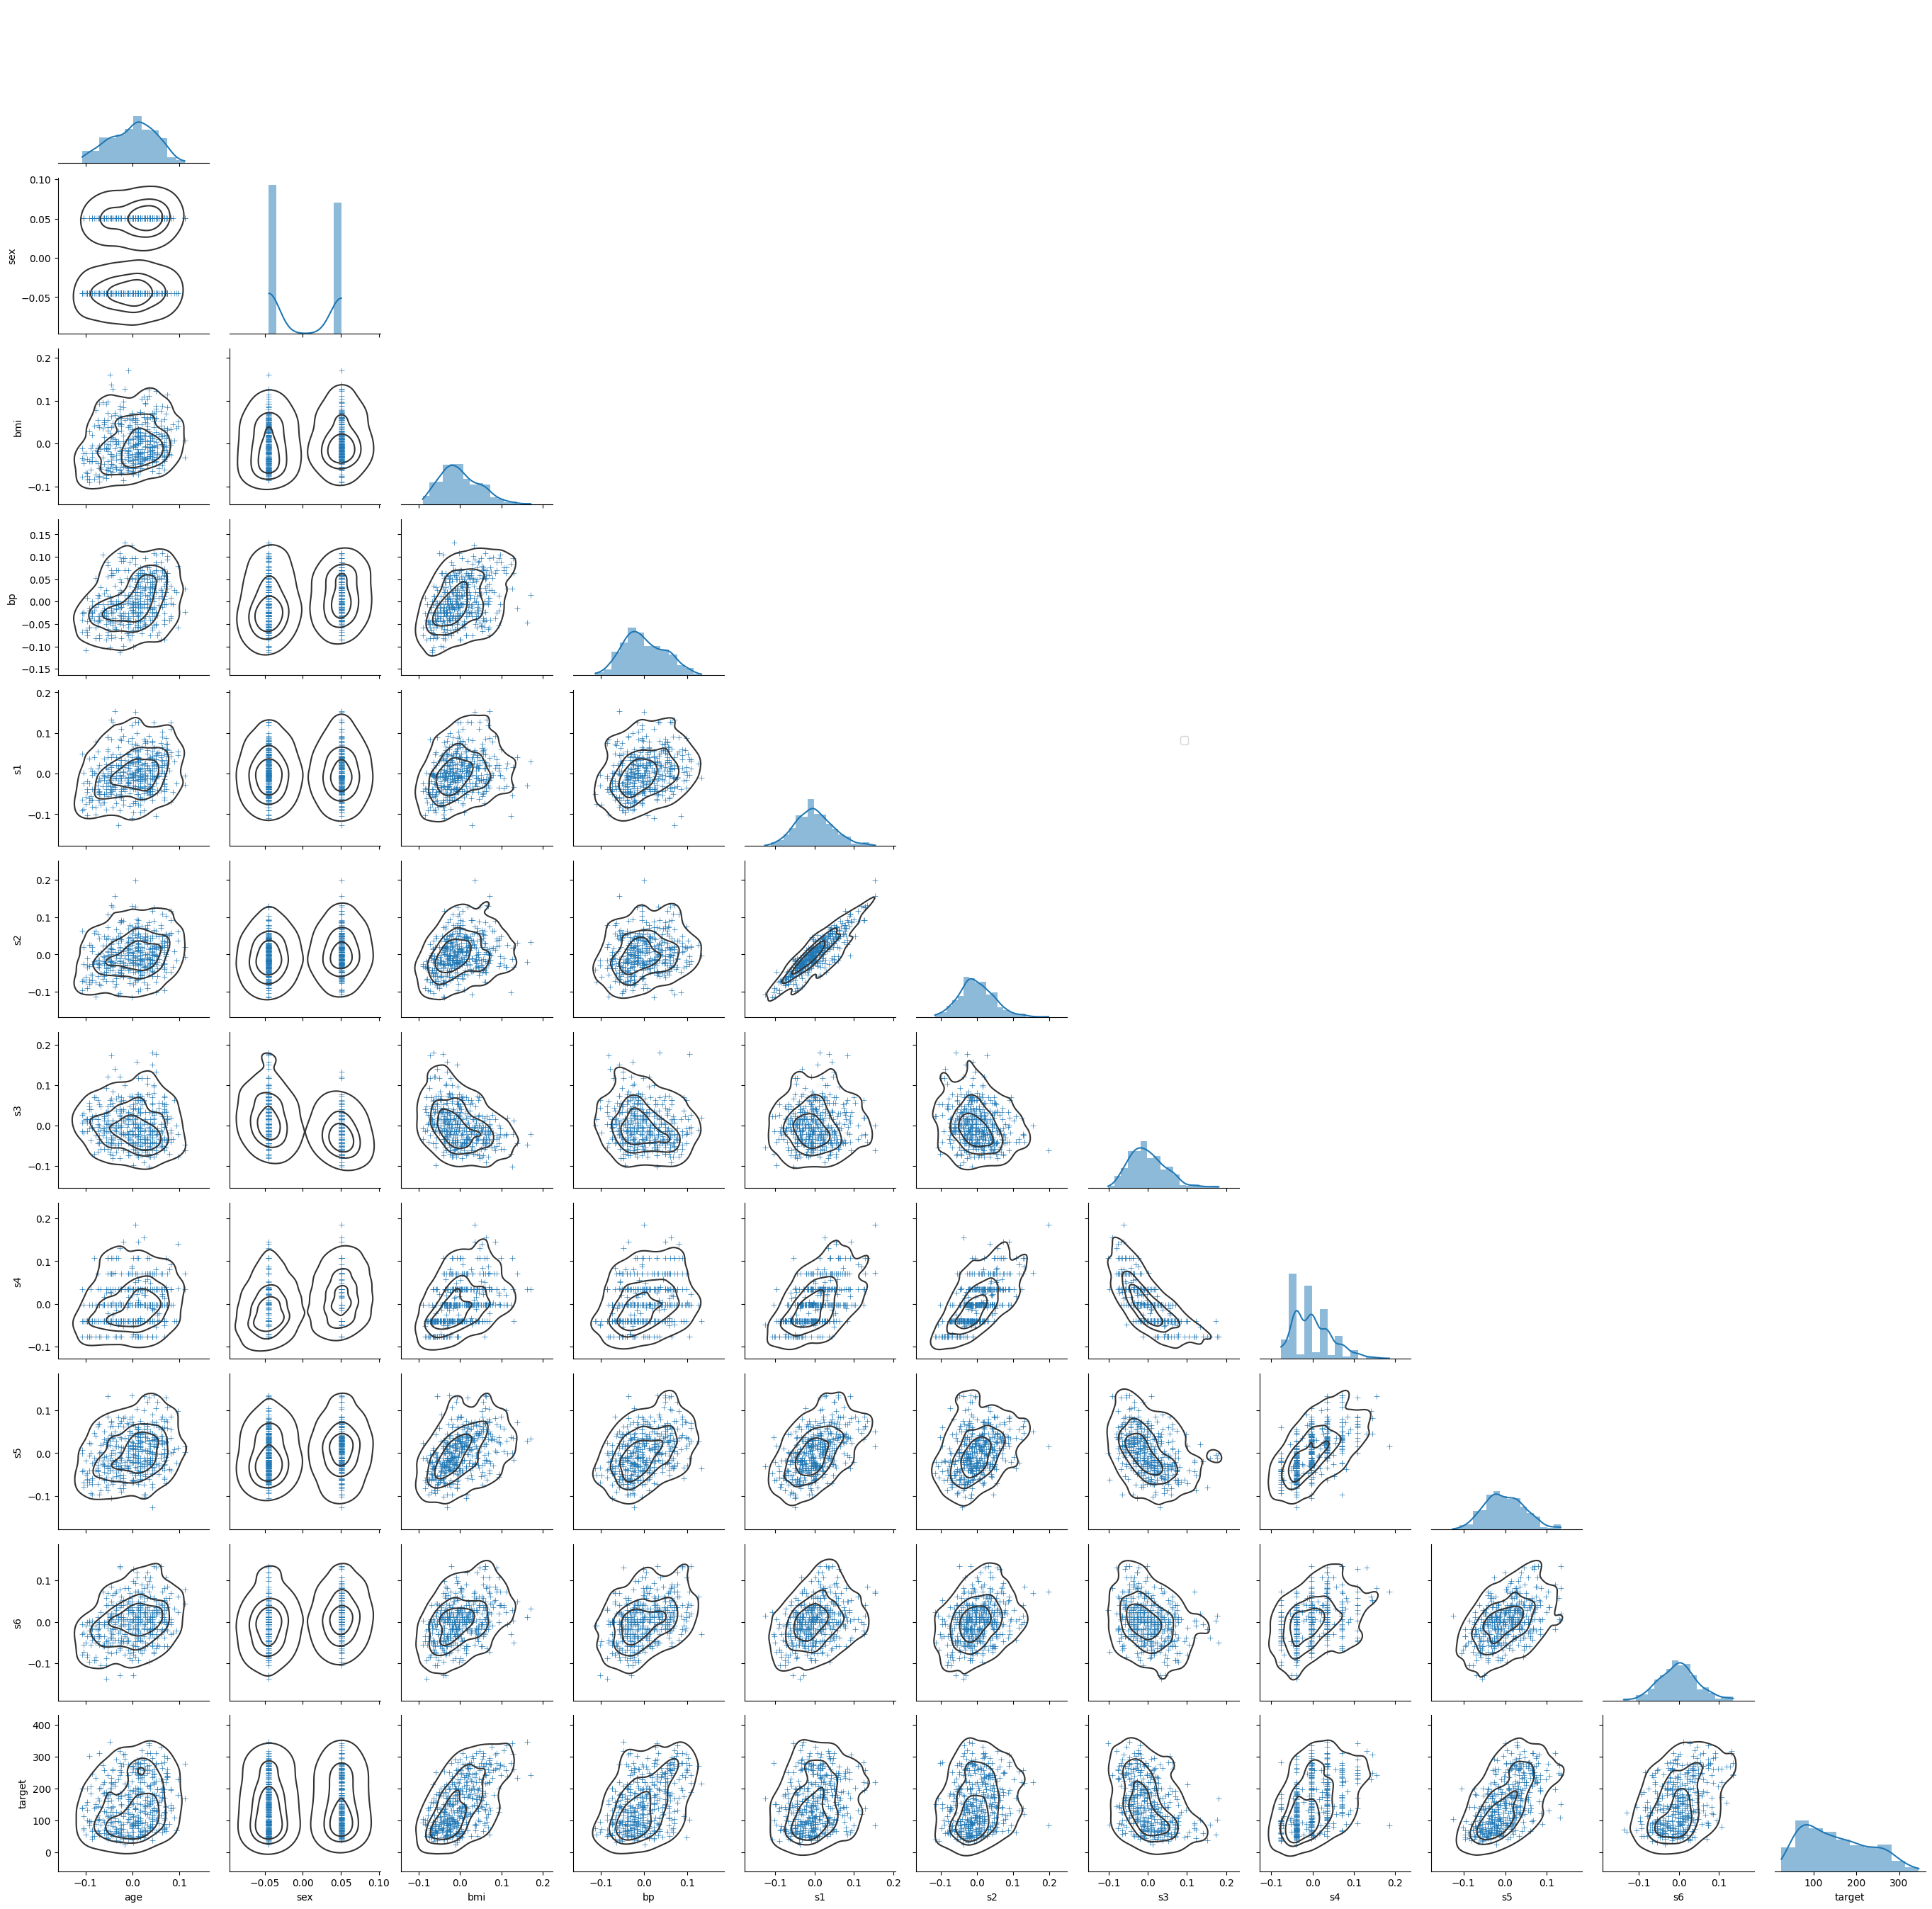

In [8]:
g = sns.PairGrid(data = diabetes_df, corner = True)
g.map_lower(sns.kdeplot, hue = None, levels = 4, color = ".2")
g.map_lower(sns.scatterplot, marker = "+")
g.map_diag(sns.histplot, element = 'step', linewidth=0,kde=True)
g.add_legend(frameon=True)
g.legend.set_bbox_to_anchor((.61,.6))

We observe some correlations with target -> Quite clean dataset



According to your intuition, which are independant variables and which are dependant variables.

Try to list all your observations here:

- ..

- ..



## Inferencial analysis

Let's use statsmodels to create a linear model using the diabetes dataset. 



In [9]:
ols = sm.OLS(y, sm.add_constant(X)).fit()

Then, we will obtain an inference summary with the plausible values for the linear coefficients for each column.


In [10]:
ols.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 target   R-squared:                       0.518
Model:                            OLS   Adj. R-squared:                  0.507
Method:                 Least Squares   F-statistic:                     46.27
Date:                Wed, 14 Dec 2022   Prob (F-statistic):           3.83e-62
Time:                        15:44:27   Log-Likelihood:                -2386.0
No. Observations:                 442   AIC:                             4794.
Df Residuals:                     431   BIC:                             4839.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        152.1335      2.576     59.061      0.000     147.071     157.196
age          -10.0099     59.749     -0.168      0.867    -127.446     107.426
sex         -239.8156     61.222     -3.917      0.000    -360.147    -119.484
bmi          519.8459     66.533      7.813      0.000     389.076     650.616
bp           324.3846     65.422      4.958      0.000     195.799     452.970
s1          -792.1756    416.680     -1.901      0.058   -1611.153      26.802
s2           476.7390    339.030      1.406      0.160    -189.620    1143.098
s3           101.0433    212.531      0.475      0.635    -316.684     518.770
s4           177.0632    161.476      1.097      0.273    -140.315     494.441
s5           751.2737    171.900      4.370      0.000     413.407    1089.140
s6            67.6267     65.984      1.025      0.306     -62.064     197.318
==============================================================================
Omnibus:                        1.506   Durbin-Watson:                   2.029
Prob(Omnibus):                  0.471   Jarque-Bera (JB):                1.404
Skew:                           0.017   Prob(JB):                        0.496
Kurtosis:                       2.726   Cond. No.                         227.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Note that we have the possibility to observe only the coefficients calculated by statsmodel:



In [11]:
ols.params 

const    152.133484
age      -10.009866
sex     -239.815644
bmi      519.845920
bp       324.384646
s1      -792.175639
s2       476.739021
s3       101.043268
s4       177.063238
s5       751.273700
s6        67.626692
dtype: float64

There is another information important, the $r^2$ (rsquared). Why this is important ? What does it mean?



In [12]:
ols.rsquared

0.5177484222203498

Let's take a moment to understand this table. What represents each column?

- coef : 
- std err : 
- t : 
- P>|t| : 
- [0.025 : 
- 0.975] : 



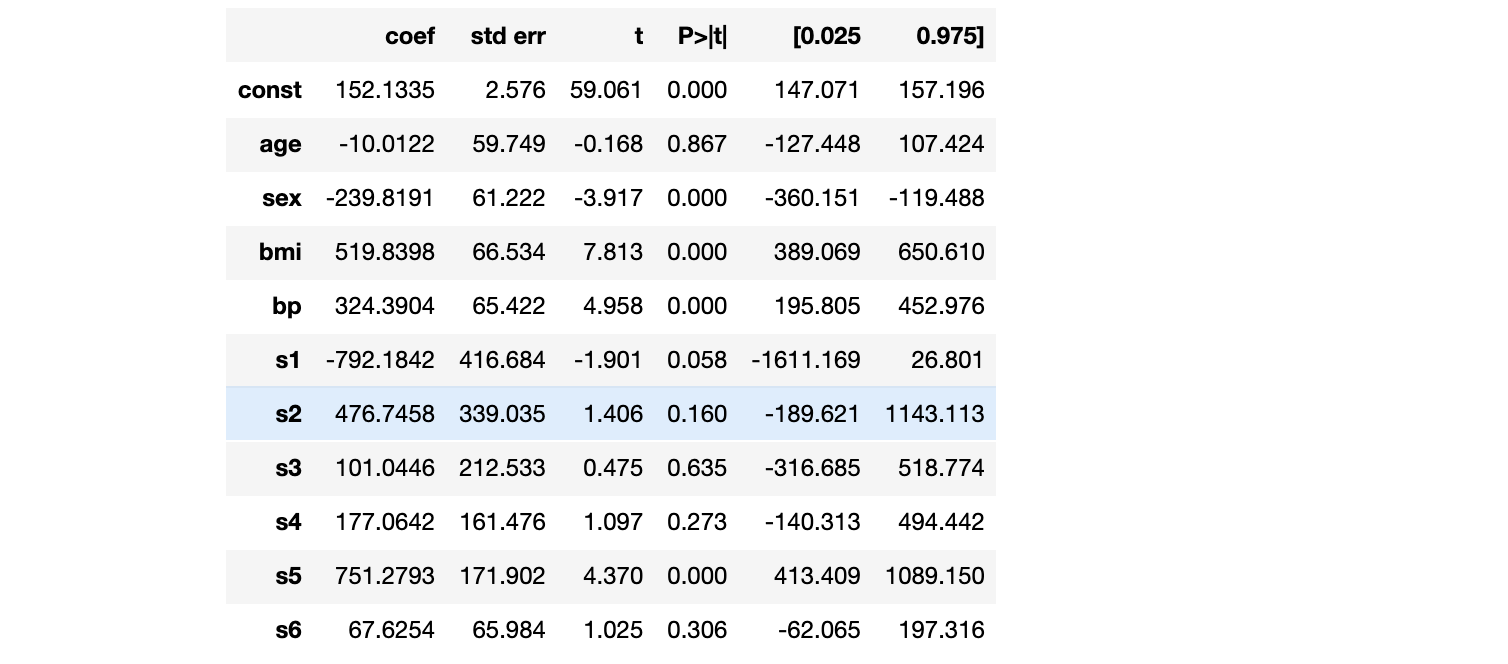


We have 10 features, so 10 coefficients to find (b1 to b10), b0 is the intercept (const). For each feature, statsmodel evaluates the plausible values by inference



**Inferential analysis for BMI**

In the case of bmi, we can say that the plausible values for its real coefficient (b4) is found between 389 and 650 with 95% confidence interval. It can also be seen as a Normal distribution centered in 519.83 and a std err of 66.53 (considering that we have 442 samples, our t-distribution becomes a normal distribution [source](https://statisticsbyjim.com/hypothesis-testing/degrees-freedom-statistics/))

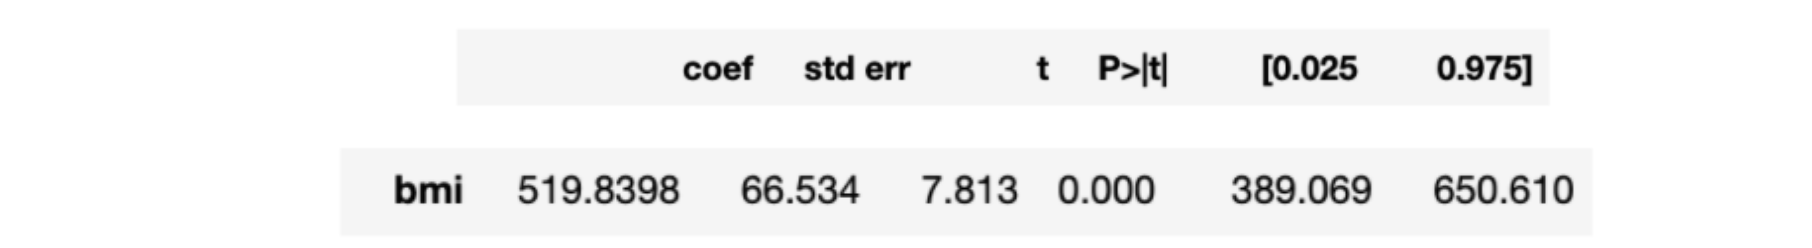


- $\hat{b_4} = 519.8398$  with  $[389.069 , 650.610]$

- $p(\hat{b_4}) \sim \mathcal{T}_{n=442} \sim \mathcal{N}(coef = 519.83, std_{err}=66.534)$


But, how much we can trust this result?

$p(\hat{b_4}) \sim \mathcal{N}(519.83, 66.534)$

We need to check the p-values and t-statistics. Note that
t-statistic, p-value and 95% confidence interval correspond to the null hypothesis:

H0 : target (y) is not correlated with all the weights of bmi

If H0 was true, the observed $b_4$ would have a t-score close to 0:

$t = \frac{\hat{b_4} - b_4}{std_{err}(b_4)} = \frac{519.83-0}{66.534} = 7.813$  std deviations above the mean !!

This is not possible if H0 was true



In [13]:
519.83/66.534

7.812997865752848

p-value is the probability that what we observed with $p(\hat{b_4})$ is due to pure chance:

- Probability to observe $\hat{b_4} = 519.83$ or bigger
- Probability of observing $\hat{b_4} > 519.83$ if it were sampled from a distribution $\mathcal{N}(0, 66.534)$
- or p-value $\sim 0 < 0.05 $

Conclusion of the inference for the relationship of bmi and the target:
- this means that it is impossible that the feature bmi is not correlated with the target. 
- the relationship between bmi and target is statistically significant

**Inferential analysis for age**

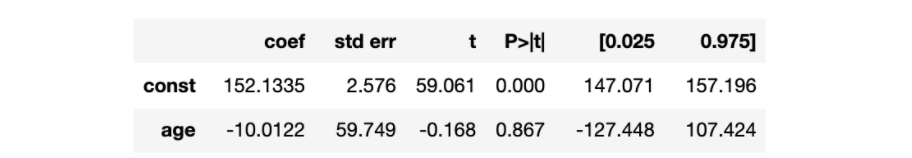




we can say that the plausible values for its real coefficient (b1) is found between -127.44 and 107.42 with 95% confidence interval. It can also be seen as a Normal distribution centered in -10.01 and a std err of 59.74 

- $\hat{b_1} = -10.01$  with  $[-127.44 , 107.42]$

- $p(\hat{b_1}) \sim \mathcal{T}_{n=442} \sim \mathcal{N}(coef = -10.01, std_{err}=59.74)$


But, how much we can trust this result?

$p(\hat{b_1}) \sim \mathcal{N}(-10.01, 59.74)$

We need to check the p-values and t-statistics. 

Test Hypothesis:

H0 : target (y) is not correlated with the weight of age

If H0 was true, the observed $b_1$ would have a t-score close to 0:

$t = \frac{\hat{b_4} - b_4}{std_{err}(b_4)} = \frac{-10.01-0}{59.74} = -0.167$  std deviations above the mean.

This is possible if H0 was true


In [14]:
-10.01/59.74

-0.16755942417140943

p-value is the probability that what we observed with $p(\hat{b_1})$ is due to pure chance:

- Probability to observe $\hat{b_1} = −10.01$ or bigger
- Probability of observing $\hat{b_1} > −10.01$ if it were sampled from a distribution $\mathcal{N}(0, 59.74)$
- or p-value $\sim 0.867 > 0.05 $

Conclusion of the inference for the relationship of age and the target:
- this means that it is possible that the feature age is not correlated with the target. 
- the relationship between age and target is not statistically significant, is just pure chance :)

According to this, age, s1, s2, s3, s4 and s6 have p-values > 0.05 which means that have low correlation with the target. 

On the contrary sex,bmi,bp and S5 have coefficients that are statistically significant

**Inferential analysis on the Multi-regression model**

We have to observe the F-statistics and use the following null hypothesis

H0 : target (y) is not correlated with all the weights of X (age, sex, bmi, ..., s6) 

F-statistics represent the overall statistical significance of the regression. 

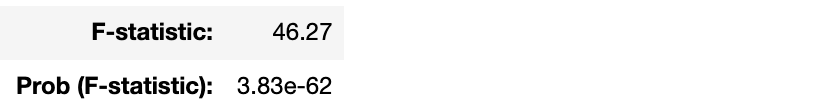


- F represent a combined p-value of all your coefficients
- F exists between 1 and $\infty$
- F $\sim$ 1 means that H0 is true
- F $>$ 1 means that at least one coefficient has a p-value < 0.05 
- F $>>$ 1 means that the regression is statisticelly significant

In our case F-statistic is 46.27, is not so big and means that at least one coefficient is statistical significant but not all. 

Some features are not useful to our regression model. To do so, we can use : 
- feature selection (feature permutation, ANOVA, ...)
- regularization 

In [15]:
pd.set_option('display.float_format', '{:.4f}'.format)
coefs_with_p_value = ols.pvalues.to_frame(name='p-values').iloc[1:]
coefs_with_p_value

,p-values
age,0.8670
sex,0.0001
bmi,0.0000
bp,0.0000
s1,0.0579
s2,0.1604
s3,0.6347
s4,0.2735
s5,0.0000
s6,0.3060


## ANOVA analysis

ANOVA table compares the variance of the residuals from the regression model to the variance of the original data. The difference is that the “Overall Fit” report contains numbers like R2, which measures the amount of explaining done by the regression on a continuum. The ANOVA table tries to answer a yes-or-no question, “do any of the predictors in this regression do a useful amount of explaining?” More formally, the ANOVA table conducts a hypothesis test of H0: all slopes (other than the intercept) are zero against H1:  there is at least one nonzero slope. [source](https://towardsdatascience.com/pipelines-custom-transformers-in-scikit-learn-ef792bbb3260)

In [16]:
X.columns

Index(['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6'], dtype='object')

In [17]:
all_columns = "+".join(X.columns)

model_patsy = ols(f'target ~ {all_columns}', data=diabetes_df).fit()

anova_table = sm.stats.anova_lm(model_patsy, typ=2)
anova_table

TypeError: 'RegressionResultsWrapper' object is not callable

With ANOVA we also observe the p-values obtained for each feature:
- age, s1, s2, s3, s4 and s6 have p-values > 0.05, so not statistically significant
- sex,bmi,bp and S5 have p-values < 0.05, so they are statistically significant.

The F-statistic has to be high. it follows the same conclusions as the p-values. Since there is at least one variable statistically significant, it is highly likely that at least one of the variables in the model is a useful predictor.

We conclude that sex (bmi,bp and S5) significantly affects the yield target and are good variables for the regression

In [ ]:

best_columns = "+".join(['sex', 'bmi', 'bp',  's5'])
model_patsy = ols(f'target ~ {best_columns}', data=diabetes_df).fit()

anova_table = sm.stats.anova_lm(model_patsy, typ=2)
anova_table

With a second ANOVA, we observe that sex have p-values 0.0174 < 0.05 which means that affects the target but probably less that the others. 